<a href="https://colab.research.google.com/github/durg3sh10/Iris_Data_Decision_Tree_classifier/blob/main/IrisData_Decision_Tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
The task is to create a Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

#  <u> **What is a Decision Tree?**   </u>

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

Decision Trees are popular because they have two key properties:

* Simplicity: Decision Trees are simple, visually appealing and are easy to interpret.
* Accuracy: Advance Decision Tree models show exceptional performance in predicting patterns in complex data.

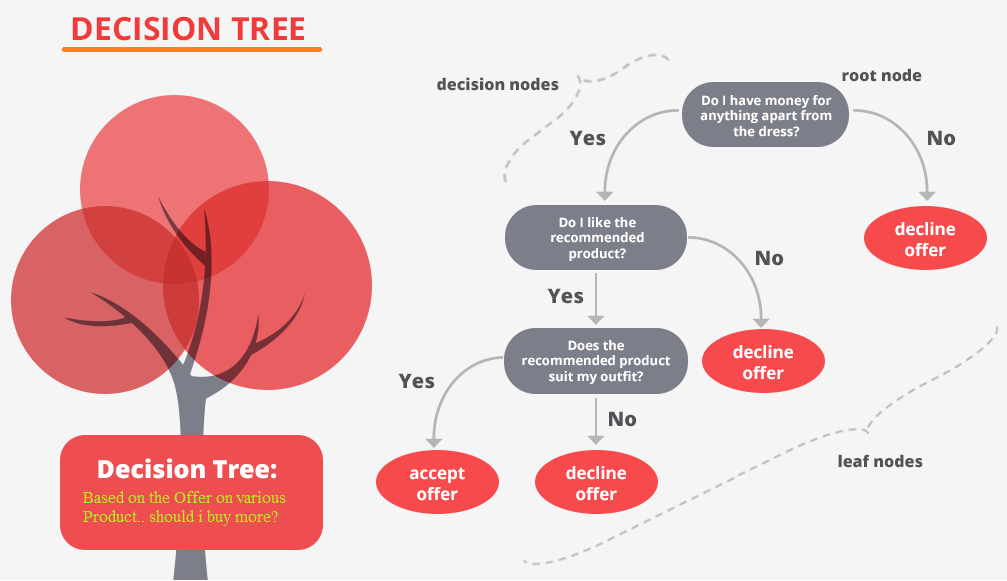

# **How to split?**

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

<b>Methods to determine best split:</b>

1. Information Gain (categorical variable)

2. Gini (categorical variable)

3. Chi Square (continous variable)

4. Reduction in Variance (continous variable)



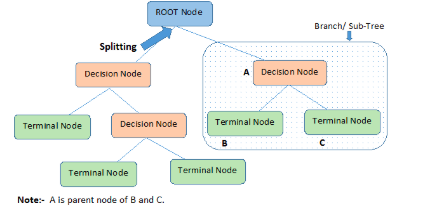

# **Decision Trees Implementation**

Data includes three iris species (Setosa, Versicolour, and Virginica) with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [127]:
# Importing the libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Reading the dataset from the csv file using read_csv function of pandas dataframe.

In [128]:
iris_df = pd.read_csv("/content/drive/MyDrive/Team capstone project/Iris.csv", index_col= "Id")

# **Exploratory Data Analysis**

In [129]:
iris_df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [130]:
iris_df.shape

(150, 5)

In [131]:
iris_df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

There are three classes of iris plants: 'setosa', 'versicolor' and 'virginica'.


It is necessary to determine whether the data we are using has duplicated rows. We are going to identify duplicate rows and remove the duplicate rows.

In [132]:
duplicate_rows = iris_df[iris_df.duplicated()]
duplicate_rows.shape

(3, 5)

There are 3 duplicate rows in our dataset.

In [133]:
iris_df = iris_df.drop_duplicates()

**Identifying and Handling Missing Data:**

* In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

* In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

We will detect missing values and handle them in a proper and efficient way by first finding columns with missing values.



In [134]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in iris_df.columns if iris_df[feature].isnull().sum()>1]
features_with_null_values

[]

There are no null values in our dataset

###Divide data into independent variables('x'), Dependent variable('y') based on the problem statement.

In [135]:
dependent_variable = 'Species'
independent_variables = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [136]:
x = iris_df[independent_variables]
y = iris_df[dependent_variable]

## **Train - Test Split:**

Now that we have extracted the data attributes and corresponding labels, we will split them to train and test datasets from the variable x and y.

Separating data into training and testing sets is an important part of evaluating data mining models

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [138]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(37, 4)
(110, 4)
(37,)
(110,)


###Since, this is a classification problem, we will import the DecisionTreeClassifier function from the sklearn library.

When we initiate the Decision Tree Classifier, by-default the criterion parameters is set to ‘gini’, and there are various other parameters as well, which we can go with the default or change it if required.

Next, we will fit the classifier on the train attributes and labels using fit method.

In [139]:
iris_classifier = DecisionTreeClassifier()
iris_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Now, we will use the trained  model to predict the labels of the test attributes.

In [140]:
y_test_predict = iris_classifier.predict(x_test)
y_test_predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [141]:
y_test.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

### We will now evaluate the predicted classes using some metrics. Measuring accuracy of the Classifier

In [142]:
accuracy_score(y_test, y_test_predict)

0.972972972972973

From the score it seems using Gini as Criterion we found the Accuracy on  the test dataset it is about 97%.

### Is there a way we can visualize the Tree showing which Model has been used?

### The answer is yes. We can.

### **Visulaizing Decision Tree**

In [143]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

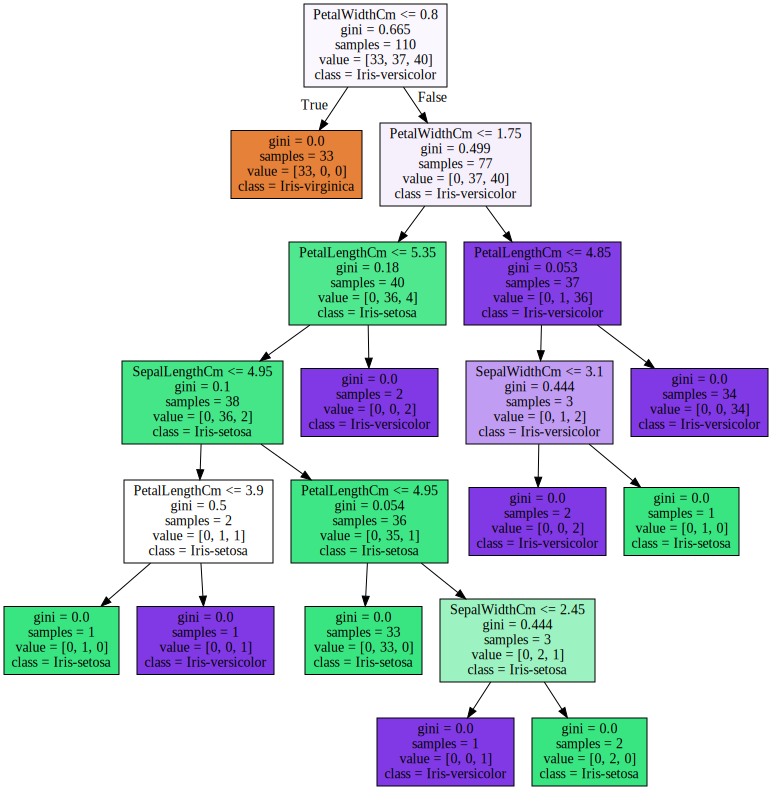

In [147]:
dot_data  = tree.export_graphviz(iris_classifier, out_file=None, feature_names= x_train.columns, class_names=["Iris-virginica", "Iris-setosa", "Iris-versicolor"] , filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph

### Advantages
<b>Easy to Understand:</b> Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.


<b>Useful in Data exploration: </b> Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.
</b>Less data cleaning required:</b> It requires less data cleaning compared to some other modeling techniques. <b>It is not influenced by outliers and missing values to a fair degree.</b>


<b>Non Parametric Method:</b> Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

### <b>Disadvantages</b>


<b>Over fitting:</b> Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.